对遍历半径的结果（20210427Radius 文件夹中结果）进行数据整理
并 制作图表
*****
输出三张图：大类、小类1、小类二

每张图 横坐标为半径，纵坐标为准确率，三条折线，为三种分类器

*****

建立三个三行20列的数组 三个数组分别是 C2、C41、C42
每行表示df、nb、svm
每列为r

依次读取对应的文件，将最后一行的第一个数据保存到单元格中
        

In [1]:
# seaborn test
%matplotlib inline
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

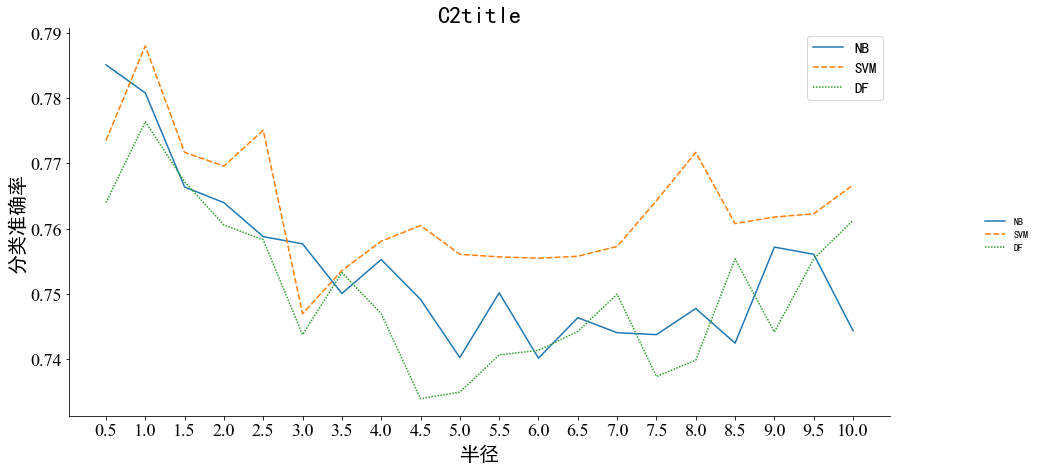

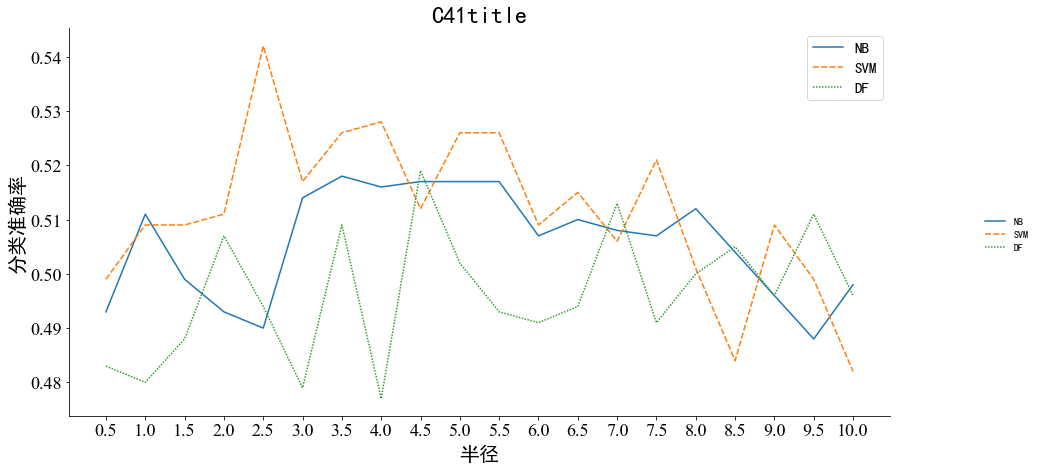

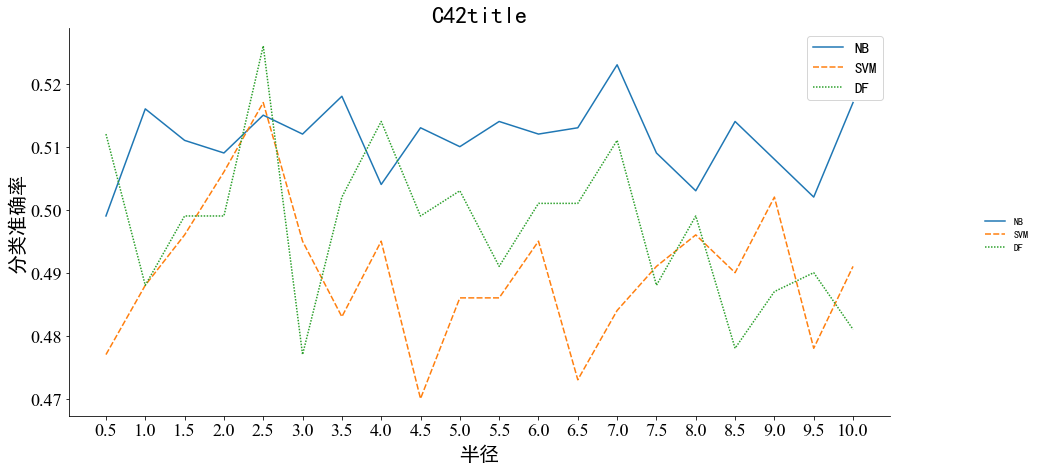

In [4]:
# read data
data_path = r'D:\project\BrainEEG\202104\results\20210427Radius'     # file fold path

for Class in ['C2','C41','C42']:
    this_Class_data = []
    for Classifier in ['nb','svm','df']:
        this_Classifier_data = []
        for Radius in np.arange(0.5,10.5,0.5):
            Radius = format(Radius, '.1f')
            data_file_name = "r="+Radius+"_Base_select_un_decompose_"+Class+"_"+Classifier+".csv"
            # data_file_name = "r=0.5_Base_select_un_decompose_C2_nb.csv"
            # print(data_path,"\\",data_file_name)
            csv_data = pd.read_csv(f'{data_path}\\{data_file_name}', encoding = "ISO-8859-1", index_col=0) # header = 1
            # csv_data
            # read the first data in the last line of this file
            this_data = csv_data.values[-1].tolist()[0]    # 读最后一行 csv_data.values[-1].tolist()； 读最后一行第一个数据 csv_data.values[-1].tolist()[0] 
            this_data
            # split and extract the average data from string
            this_data = this_data.split('%¡À')[0]    # split and get data
            this_data = float(this_data)/100   # turn into number and represent as decimal
            # print(this_data)
            this_Classifier_data.append(this_data)
        this_Class_data.append(this_Classifier_data)
    # turn into np.array for Transform
    this_Class_data = np.array(this_Class_data).T
    # turn into data frame and add columns title and index title
    this_Class_data_frame = pd.DataFrame(this_Class_data)
    this_Class_data_frame.index = ["0.5","1.0","1.5","2.0","2.5","3.0","3.5","4.0","4.5","5.0","5.5","6.0","6.5","7.0","7.5","8.0","8.5","9.0","9.5","10.0"]
    this_Class_data_frame.columns = ['NB','SVM','DF']
    # this_Class_data_frame
    
    # 解决中文乱码问题
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    # Drawing
    figure = sns.relplot(kind="line", data=this_Class_data_frame);
    plt.xlabel("半径", fontsize=20)
    plt.ylabel("分类准确率", fontsize=20)
    plt.xticks(fontproperties = 'Times New Roman', size = 18)
    plt.yticks(fontproperties = 'Times New Roman', size = 18)
    plt.title(Class+"title", fontsize=24);
    figure.fig.set_size_inches(15,6)
    plt.legend(fontsize=15)
    plt.show()
    figure_file = Class+"radius_figure.png"
    figure.savefig(figure_file, dpi=300)
    

## Test
曲线填充

In [12]:
# read data
data_path = r'D:\project\BrainEEG\202104\results\20210427Radius'     # file fold path

Class = 'C2'

this_Class_data = []
for Classifier in ['nb','svm','df']:
    this_Classifier_data = []
    for Radius in np.arange(0.5,10.5,0.5):
        Radius = format(Radius, '.1f')
        data_file_name = "r="+Radius+"_Base_select_un_decompose_"+Class+"_"+Classifier+".csv"
        # data_file_name = "r=0.5_Base_select_un_decompose_C2_nb.csv"
        # print(data_path,"\\",data_file_name)
        csv_data = pd.read_csv(f'{data_path}\\{data_file_name}', encoding = "ISO-8859-1", index_col=0) # header = 1
        # csv_data
        # read the first data in the last line of this file
        this_data = csv_data.values[-1].tolist()[0]    # 读最后一行 csv_data.values[-1].tolist()； 读最后一行第一个数据 csv_data.values[-1].tolist()[0] 
        this_data
        # split and extract the average data from string
        this_data = this_data.split('%¡À')[0]    # split and get data
        this_data = float(this_data)/100   # turn into number and represent as decimal
        # print(this_data)
        this_Classifier_data.append(this_data)
    this_Class_data.append(this_Classifier_data)
# turn into np.array for Transform
this_Class_data = np.array(this_Class_data).T
# turn into data frame and add columns title and index title
this_Class_data_frame = pd.DataFrame(this_Class_data)
this_Class_data_frame.columns = ['NB','SVM','DF']
this_Class_data_frame['Radius']= ["0.5","1.0","1.5","2.0","2.5","3.0","3.5","4.0","4.5","5.0","5.5","6.0","6.5","7.0","7.5","8.0","8.5","9.0","9.5","10.0"]
this_Class_data_frame


,NB,SVM,DF,Radius
0,0.7851,0.7735,0.7640,0.5
1,0.7808,0.7880,0.7764,1.0
2,0.7664,0.7717,0.7672,1.5
3,0.7640,0.7696,0.7606,2.0
4,0.7588,0.7751,0.7583,2.5
5,0.7577,0.7470,0.7438,3.0
6,0.7501,0.7536,0.7533,3.5
7,0.7553,0.7581,0.7470,4.0
8,0.7492,0.7605,0.7340,4.5
9,0.7403,0.7561,0.7350,5.0


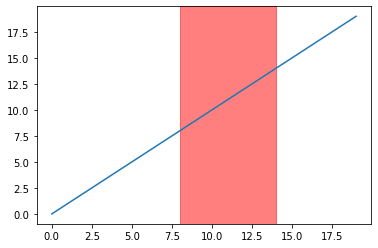

In [16]:
fig, ax = plt.subplots()
ax.plot(range(20))
ax.axvspan(8, 14, alpha=0.5, color='red')
plt.show()

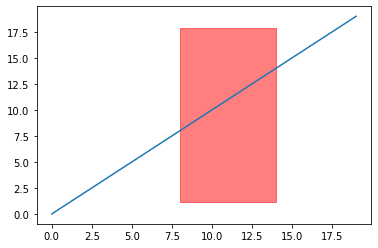

In [15]:
fig, ax = plt.subplots()
ax.plot(range(20))
ax.axvspan(8, 14, ymin=0.1, ymax=0.9, alpha=0.5, color='red')
plt.show()

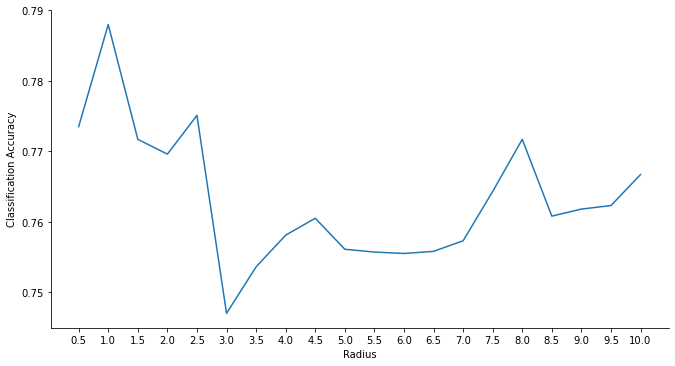

In [152]:
# sns.relplot(ci="sd", kind="line", data=this_Class_data_frame);
figure = sns.relplot(x=this_Class_data_frame.index, y='SVM', kind="line", ci='sd', data=this_Class_data_frame);
plt.xlabel("Radius")
plt.ylabel("Classification Accuracy")
figure.fig.set_size_inches(10,5)
plt.show()
figure.savefig('figure.png')

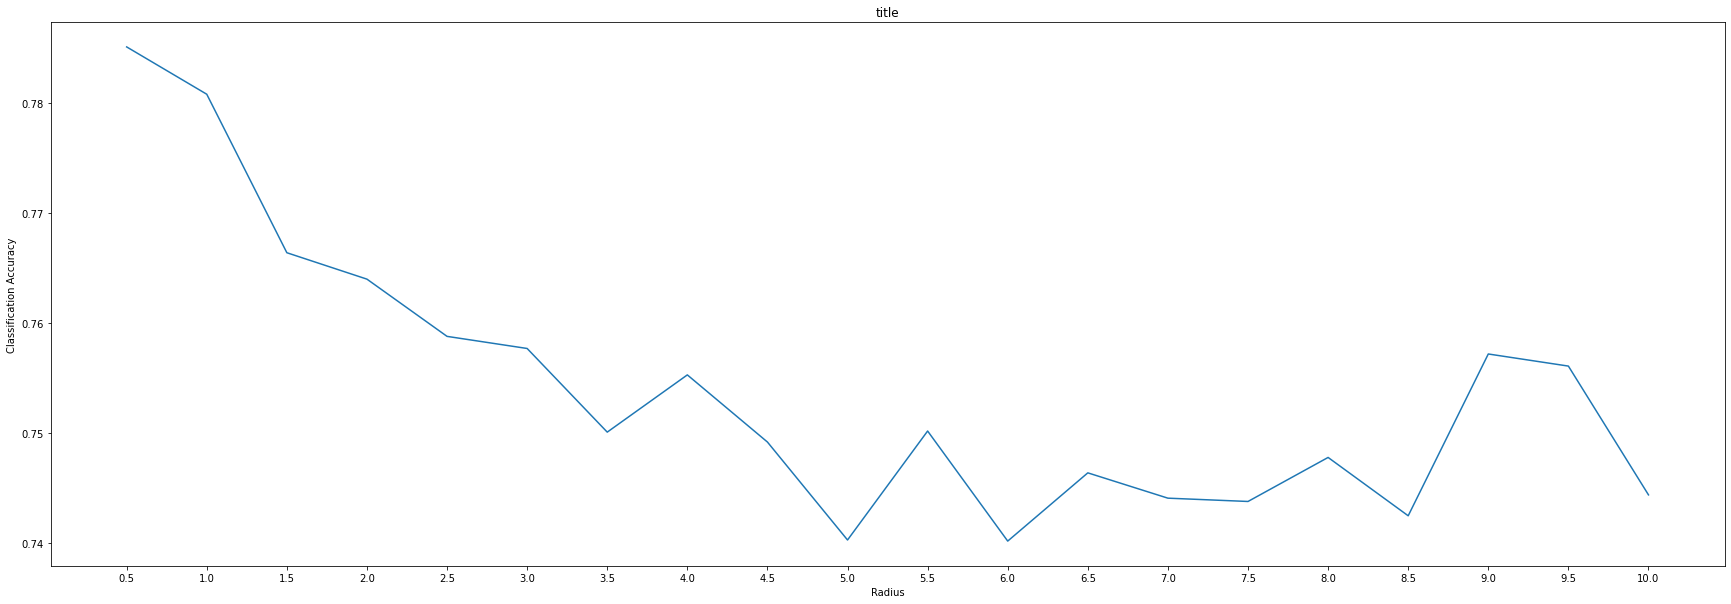

In [169]:
# sns.relplot(ci="sd", kind="line", data=this_Class_data_frame);
# figure = sns.relplot(kind="line", data=this_Class_data_frame);
figure = sns.lineplot(data=this_Class_data_frame, x="Radius", y="NB")
plt.xlabel("Radius")
plt.ylabel("Classification Accuracy")
plt.title("title");
figure.fig.set_size_inches(10,5)
plt.show()